### Fencing matches - preliminary analysis

In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets


%matplotlib inline

In [3]:
df = pd.read_csv('./data/Kaggle/ClipDescriptorKaggle.csv')

In [4]:
df.head()

,id,ClipName,URL,Start_frame,End_frame,Light1,Light2,Hit_label
0,1,0001_002_00_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,22750.0,22825.0,2,2,0-0-1
1,2,0001_002_00_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,24684.0,24759.0,2,2,1-0-0
2,3,0001_002_01_01_1,https://www.youtube.com/watch?v=uho2ldovj7o,27330.0,27405.0,2,1,1-0-0
3,4,0001_002_01_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,28051.0,28126.0,2,2,0-0-1
4,5,0001_002_02_02_1,https://www.youtube.com/watch?v=uho2ldovj7o,34040.0,34115.0,2,2,0-0-1


In [6]:
def load_key_point(path):
    with open(path, 'r') as fh:
        df_kp = json.load(fh)
    res = [np.array(el) for el in df_kp]
    return [el for el in res if el.ndim == 3]

df_kp = load_key_point('./data/Kaggle/FencersKeyPoints/0006_028_00_04_1.json')

In [7]:
df_kp[0].shape

(2, 25, 3)

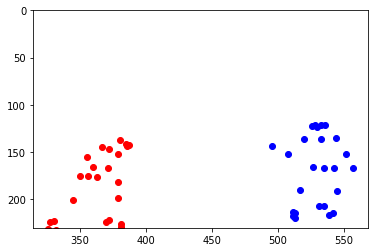

In [9]:
from ipywidgets import interactive


def plot_key_points(X, ax):
    mask = X[0].mean(axis=1) > 1
    ax.plot(X[0][mask, 0], X[0][mask, 1], 'ro')
    mask = X[1].mean(axis=1) > 1
    ax.plot(X[1][mask, 0], X[1][mask, 1], 'bo')
    ax.set_ylim(230, 0)
    
def plot_key_point_sequence(idx):
    fig, ax = plt.subplots()
    plot_key_points(df_kp[int(idx)], ax)
    plt.show()


interactive_plot = interactive(plot_key_point_sequence, idx=(0, len(df_kp)-1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot